## Exploratory Data Analysis (EDA) on Retail Sales Data

##### This project conducts Exploratory Data Analysis (EDA) on a retail sales dataset. 
##### The analysis aims to uncover trends, patterns, and customer insights that can help businesses understand their sales data and customer behavior. 
##### The dataset contains transaction-level data, including product details, customer demographics, and sales information.

### Importing Libraries

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Dataset

In [33]:
sales = pd.read_csv(r'/Users/daniellaiwagoh/Downloads/retail_sales_dataset.csv')
sales

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


### Data Exploration

In [35]:
sales.shape

(1000, 9)

In [37]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


### Checking For Null Values

In [39]:
sales.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

### Descriptive Statistics

In [41]:
sales.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


### Converting Dates and Handling Missing Values

In [43]:
sales['Date'] = pd.to_datetime(sales['Date'])
sales.dropna(inplace=True)  

### Descriptive Statistics: Price Analysis

In [47]:
mean_price = sales['Price per Unit'].mean()
median_price = sales['Price per Unit'].median()
mode_price = sales['Price per Unit'].mode()[0]
std_dev_price = sales['Price per Unit'].std()

print(f"Mean Calories: {mean_price}")
print(f"Median Calories: {median_price}")
print(f"Mode Calories: {mode_price}")
print(f"Standard Deviation of Calories: {std_dev_price}")


Mean Calories: 179.89
Median Calories: 50.0
Mode Calories: 50
Standard Deviation of Calories: 189.68135627129138


### Monthly Sales Aggregation

In [51]:
sales['Year_Month'] = sales['Date'].dt.to_period('M')
monthly_sales = sales.groupby('Year_Month')['Total Amount'].sum()
sales

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year_Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023-11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023-02
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023-01
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023-05
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023-05
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,2023-05
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,2023-11
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,2023-10
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,2023-12


### Visualizing Monthly Sales Trend

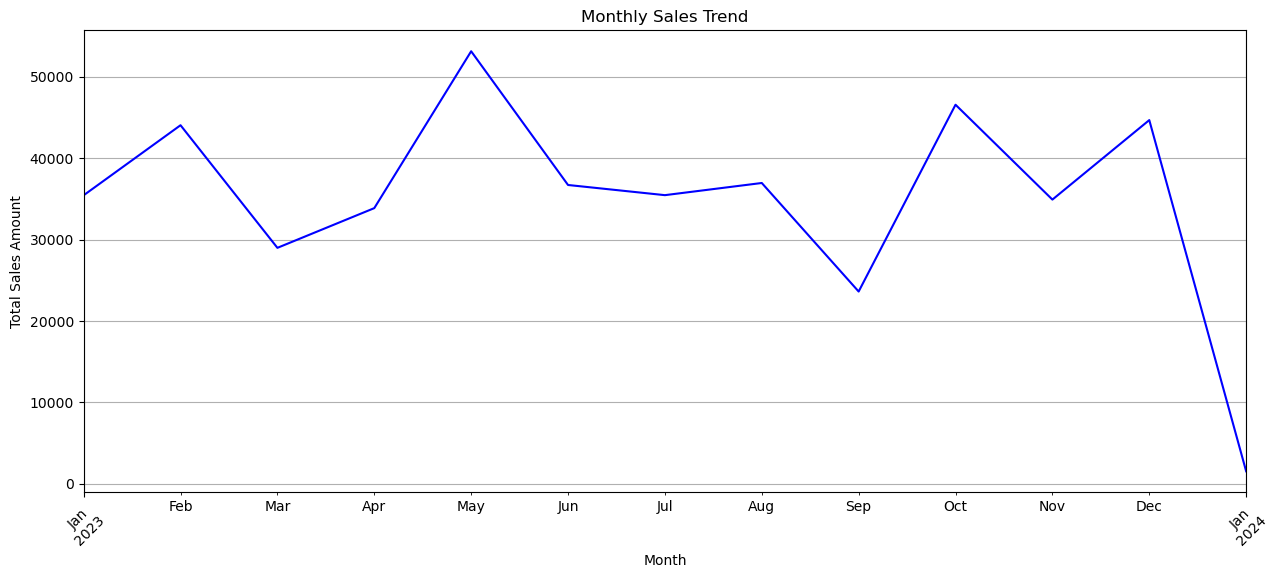

In [53]:
plt.figure(figsize=(15, 6))
monthly_sales.plot(kind='line', color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Customer Gender Distribution

In [61]:
customer_gender_count = sales['Gender'].value_counts()
print(customer_gender_count)

Gender
Female    510
Male      490
Name: count, dtype: int64


### Customer Age Statistics

In [63]:
customer_age_stats = sales['Age'].describe()
print(customer_age_stats)

count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: Age, dtype: float64


### Sales by Product Category

In [67]:
product_category_sales = sales.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print(product_category_sales)

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


### Visualizing Customer Gender Distribution

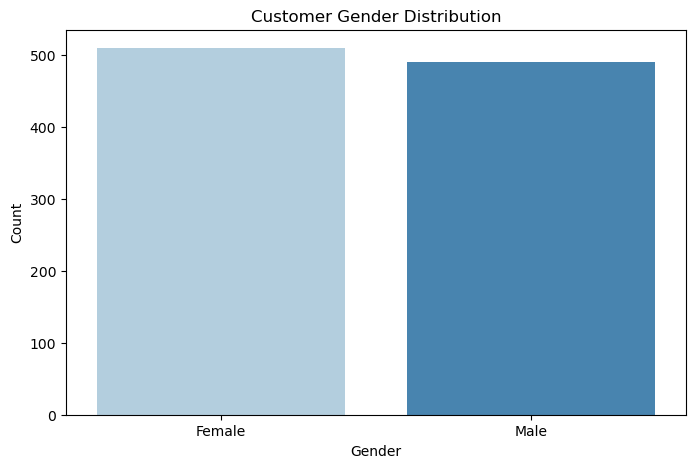

In [71]:
plt.figure(figsize=(8, 5))
sns.barplot(x=customer_gender_count.index, y=customer_gender_count.values, hue=customer_gender_count.index, palette='Blues', legend=False)
plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Visualizing Sales by Product Category

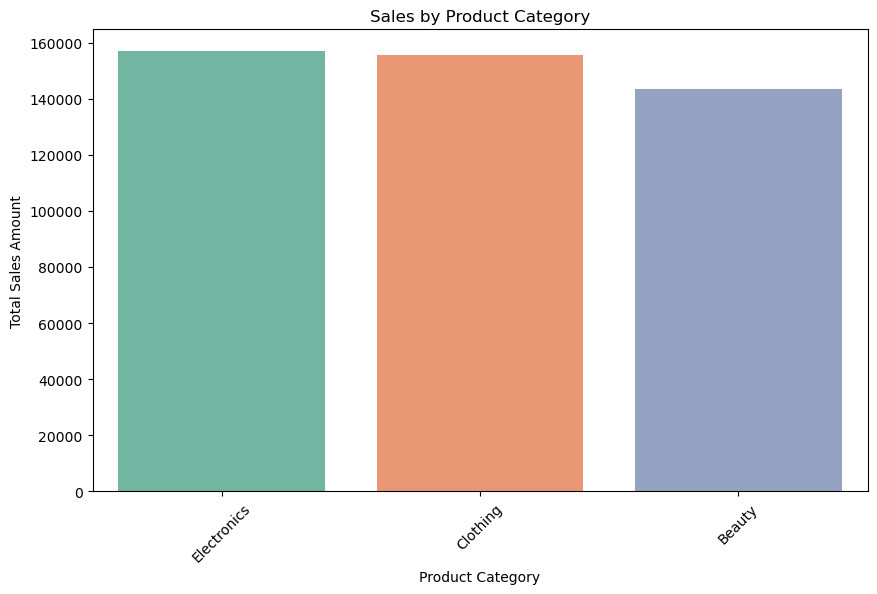

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(x=product_category_sales.index, y=product_category_sales.values, hue=product_category_sales.index, palette='Set2', legend=False)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

### Correlation Heatmap of Key Variables

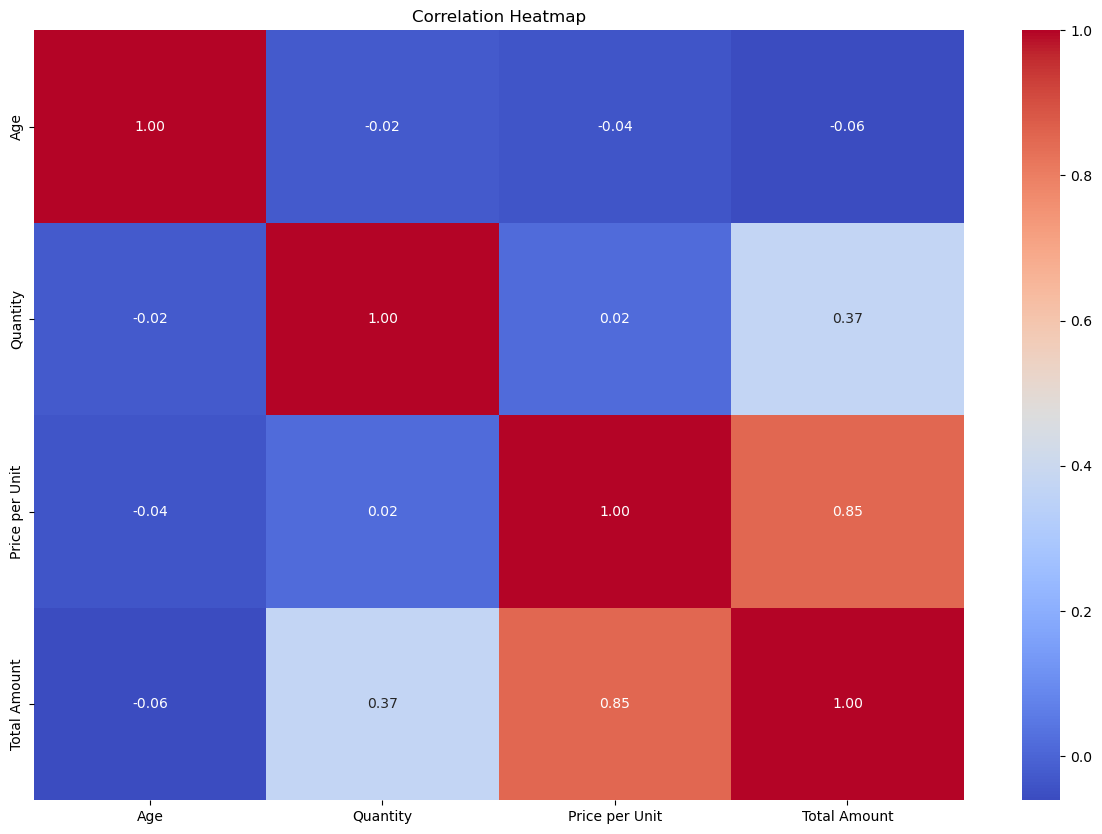

In [83]:
correlation_matrix = sales[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Stationarity Test on Monthly Sales Time Series

In [85]:
result = stattools.adfuller(monthly_sales)
stationarity = "Stationary" if result[1] < 0.05 else "Non-stationary"
print(f"The sales time series is {stationarity}.")


The sales time series is Stationary.


### Sales Recommendations

In [89]:
recommendations = ["Focus marketing efforts on the most popular product categories (e.g., Clothing, Beauty).",
"Offer discounts on electronics if they aren't performing as well.",
"Increase targeted promotions based on customer demographics, particularly for younger customers.",
"Investigate potential factors driving month-to-month fluctuations in sales."]
print("Recommendations:")
for rec in recommendations:
    print(f"- {rec}")

Recommendations:
- Focus marketing efforts on the most popular product categories (e.g., Clothing, Beauty).
- Offer discounts on electronics if they aren't performing as well.
- Increase targeted promotions based on customer demographics, particularly for younger customers.
- Investigate potential factors driving month-to-month fluctuations in sales.
